## Import a utility script with functions to be used with the results of GridSearchCV

###### This is a library that i created to help people to see the result of grid and random search
##### __author__ = "Diogo Hajjar"
#### https://github.com/Dighzy/search_plot_utils

In [6]:
!pip install search-plot-utils==0.1.1

Defaulting to user installation because normal site-packages is not writeable


# Imports




In [2]:
# First Imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import statsmodels.api as sn

from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay, precision_score,roc_auc_score,accuracy_score

from search_plot_utils import plot_grid_search, plot_grid_search_non_interactive, table_grid_search
from sklearn.model_selection import train_test_split
import random 
random.seed(4)


# Import the functions

In [50]:
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score)

def evaluate_model(model, X_train, X_test, y_train, y_test, model_name):
    # Predictions for the test set
    y_pred_test = model.predict(X_test)
    y_prob_test = model.predict_proba(X_test)
    
    # Metrics for the test set
    ac_test = accuracy_score(y_test, y_pred_test)
    pre_test = precision_score(y_test, y_pred_test, average='weighted', zero_division=0)
    rec_test = recall_score(y_test, y_pred_test, average='weighted', zero_division=0)
    f1_test = f1_score(y_test, y_pred_test, average='weighted', zero_division=0)
    
    # Predictions for the training set
    y_pred_train = model.predict(X_train)
    y_prob_train = model.predict_proba(X_train)
    
    # Metrics for the training set
    ac_train = accuracy_score(y_train, y_pred_train)
    pre_train = precision_score(y_train, y_pred_train, average='weighted', zero_division=0)
    rec_train = recall_score(y_train, y_pred_train, average='weighted', zero_division=0)
    f1_train = f1_score(y_train, y_pred_train, average='weighted', zero_division=0)

    # Print metrics
    print(f'{model_name} Performance Metrics:')
    print(f'\nTest Set Metrics:')
    print(f'Accuracy: {ac_test}')
    print(f'Precision: {pre_test}')
    print(f'Recall: {rec_test}')
    print(f'F1 Score: {f1_test}')
    
    print(f'\nTrain Set Metrics:')
    print(f'Accuracy: {ac_train}')
    print(f'Precision: {pre_train}')
    print(f'Recall: {rec_train}')
    print(f'F1 Score: {f1_train}')
    
    # Storing scores in the model_scores dictionary
    model_scores[model_name] = {
        'Test': {
            'Accuracy': ac_test,
            'Precision': pre_test,
            'Recall': rec_test,
            'F1 Score': f1_test
        },
        'Train': {
            'Accuracy': ac_train,
            'Precision': pre_train,
            'Recall': rec_train,
            'F1 Score': f1_train
        }
    }
    
    return y_pred_test, y_pred_train


import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

def plot_confusion_matrices(y_test, y_pred_test, y_train, y_pred_train, class_names):
    # Compute confusion matrices
    confusion_test = confusion_matrix(y_test, y_pred_test)
    confusion_train = confusion_matrix(y_train, y_pred_train)
    
    # Plot and save confusion matrix for test set
    plt.figure(figsize=(10, 7))
    sns.heatmap(confusion_test, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title('Confusion Matrix - Test')
    plt.show()

    # Plot and save confusion matrix for training set
    plt.figure(figsize=(10, 7))
    sns.heatmap(confusion_train, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title('Confusion Matrix - Train')
    plt.show()

# Example usage
# y_pred_test, y_pred_train = evaluate_model(model, X_train, X_test, y_train, y_test, model_name)
# plot_confusion_matrices(y_test, y_pred_test, y_train, y_pred_train, class_names)



# Data Processing

##### Importing tha data sets and using head(10) to view the data

In [3]:
# Main data set

df = pd.read_csv("dataset/Pollen_Concentration_train_test.csv")
df.head(10)

,OBJECTID,AQI,Category,ResponsiblePollutant,PollenCount,PollenType,PollenDescription,ReportDateTime
0,1,74.0,Moderate,Ozone 8-hr,3.0,Grass,Ragweed,2016/07/23 05:00:00+00
1,2,64.0,Moderate,Ozone 8-hr,4.0,Grass,Ragweed,2016/07/22 05:00:00+00
2,3,55.0,Moderate,PM2.5,3.0,Grass,Slight,2016/07/21 05:00:00+00
3,4,57.0,Moderate,PM2.5,4.0,Grass,Slight,2016/07/20 05:00:00+00
4,5,54.0,Moderate,PM2.5,3.0,Grass,Slight,2016/07/19 05:00:00+00
5,6,46.0,Good,Ozone 8-hr,3.0,Grass,Slight,2016/07/18 05:00:00+00
6,7,48.0,Good,Ozone 8-hr,3.0,Grass,Slight,2016/07/17 05:00:00+00
7,8,74.0,Moderate,Ozone 8-hr,3.0,Grass,Slight,2016/07/16 05:00:00+00
8,10,47.0,Good,PM2.5,2.0,Grass,Slight,2016/07/14 05:00:00+00
9,11,61.0,Moderate,PM2.5,3.0,Grass,Slight,2016/07/13 05:00:00+00


#### Data verification and visualization

In [4]:
# Checking descriptive statistics to check the mathematical values of the DataFrame
df.describe()

,OBJECTID,AQI,PollenCount
count,8659.000000,8431.000000,4911.000000
mean,4358.988913,45.144230,16.523315
std,2514.384548,16.775563,68.501783
min,1.000000,0.000000,0.000000
25%,2180.500000,34.000000,3.000000
50%,4363.000000,44.000000,6.000000
75%,6536.500000,53.000000,9.000000
max,8709.000000,151.000000,1666.000000


In [5]:
# Checking the data and Dtype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8659 entries, 0 to 8658
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   OBJECTID              8659 non-null   int64  
 1   AQI                   8431 non-null   float64
 2   Category              8659 non-null   object 
 3   ResponsiblePollutant  8429 non-null   object 
 4   PollenCount           4911 non-null   float64
 5   PollenType            4523 non-null   object 
 6   PollenDescription     8539 non-null   object 
 7   ReportDateTime        8659 non-null   object 
dtypes: float64(2), int64(1), object(5)
memory usage: 541.3+ KB


In [6]:
# shape of df
df.shape

(8659, 8)

In [7]:
# Checking na values
df.isnull().sum()

OBJECTID                   0
AQI                      228
Category                   0
ResponsiblePollutant     230
PollenCount             3748
PollenType              4136
PollenDescription        120
ReportDateTime             0
dtype: int64

# Replacing missing values

In [8]:
# Replacing missing values with the median to maintain data consistency without introducing bias
df['PollenCount'] = df['PollenCount'].fillna(df['PollenCount'].median())
df['AQI'] = df['AQI'].fillna(df['AQI'].median())

df.isnull().sum()


OBJECTID                   0
AQI                        0
Category                   0
ResponsiblePollutant     230
PollenCount                0
PollenType              4136
PollenDescription        120
ReportDateTime             0
dtype: int64

In [9]:
# Replacing categorical missing values with the mode 
df['ResponsiblePollutant'] = df['ResponsiblePollutant'].fillna(df['ResponsiblePollutant'].mode()[0])
df['PollenType'] = df['PollenType'].fillna(df['PollenType'].mode()[0])
df['PollenDescription'] = df['PollenDescription'].fillna(df['PollenType'].mode()[0])

df.isnull().sum()

OBJECTID                0
AQI                     0
Category                0
ResponsiblePollutant    0
PollenCount             0
PollenType              0
PollenDescription       0
ReportDateTime          0
dtype: int64

In [10]:
# Checking descriptive statistics to check the mathematical values of the DataFrame
df.describe()

,OBJECTID,AQI,PollenCount
count,8659.000000,8659.000000,8659.000000
mean,4358.988913,45.114101,11.968357
std,2514.384548,16.554220,51.849093
min,1.000000,0.000000,0.000000
25%,2180.500000,34.000000,5.000000
50%,4363.000000,44.000000,6.000000
75%,6536.500000,52.000000,7.000000
max,8709.000000,151.000000,1666.000000


## Transforming the ReportDateTime Column into a more meaningful feature ( week_day )


In [11]:
### Time-Based Features:

#- **Weekday**: To see if pollen concentrations have correlation with certain days.

# Weekday
df['ReportDateTime'] = pd.to_datetime(df['ReportDateTime'])
df['weekday'] = df['ReportDateTime'].dt.weekday
df['month'] = df['ReportDateTime'].dt.month
df['hour'] = df['ReportDateTime'].dt.hour

print(df[['weekday', 'month', 'hour']].tail())

      weekday  month  hour
8654        0     12     6
8655        6     12     6
8656        5     12     6
8657        4     12     6
8658        3     12     6


# Droping unnecessary columns

In [12]:
df = df.drop(['OBJECTID','ReportDateTime'],axis=1)
df.head(3)

,AQI,Category,ResponsiblePollutant,PollenCount,PollenType,PollenDescription,weekday,month,hour
0,74.0,Moderate,Ozone 8-hr,3.0,Grass,Ragweed,5,7,5
1,64.0,Moderate,Ozone 8-hr,4.0,Grass,Ragweed,4,7,5
2,55.0,Moderate,PM2.5,3.0,Grass,Slight,3,7,5


# Seeing the categorical values

In [13]:
categoricals = ['Category', 'ResponsiblePollutant', 'PollenType', 'PollenDescription']
for value in categoricals:
    print(df[value].value_counts())
    print()

Category
Good                              5823
Moderate                          2527
Not on file                        228
Unhealthy for Sensitive Groups      76
Unhealthy                            4
SLIGHT                               1
Name: count, dtype: int64

ResponsiblePollutant
PM2.5              6247
Ozone 8-hr         2292
Carbon monoxide      85
PM10                 30
Oz                    3
Ozone 1-hr            2
Name: count, dtype: int64

PollenType
Grass        6433
Ragweed       547
Cedar         402
Elm           363
Alder         274
Juniper       223
Birch         176
Maple         131
Hickory        86
Oak            15
Pine            3
Mulberry        2
Goldenrod       1
Poplar          1
Ash             1
Hackberry       1
Name: count, dtype: int64

PollenDescription
Not on file        3624
Slight             1242
 Maple              857
 Ragweed            806
 Grass              499
 Juniper            348
Moderate            294
 Mulberry           171
 C

In [14]:
df.loc[df['PollenDescription'] == 'Not on file', 'PollenDescription'] = df['PollenDescription'].mode()[0]
print(df['PollenDescription'].value_counts())

PollenDescription
Not on file        3624
Slight             1242
 Maple              857
 Ragweed            806
 Grass              499
 Juniper            348
Moderate            294
 Mulberry           171
 Cedar              140
Grass               120
 Pine               113
 Poplar              89
 Oak                 83
 Sweet Gum           66
Heavy                57
 Elm                 54
Extremely Heavy      43
 Walnut              20
 Alder               15
 Birch               12
 Hickory              5
 Hackberry            1
Name: count, dtype: int64


# Creating Dummies

In [15]:
# Creating dummies for the categorical columns 
df = pd.get_dummies(df, drop_first=True)

In [16]:
df.head(3)

,AQI,PollenCount,weekday,month,hour,Category_Moderate,Category_Not on file,Category_SLIGHT,Category_Unhealthy,Category_Unhealthy for Sensitive Groups,...,PollenDescription_ Poplar,PollenDescription_ Ragweed,PollenDescription_ Sweet Gum,PollenDescription_ Walnut,PollenDescription_Extremely Heavy,PollenDescription_Grass,PollenDescription_Heavy,PollenDescription_Moderate,PollenDescription_Not on file,PollenDescription_Slight
0,74.0,3.0,5,7,5,True,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
1,64.0,4.0,4,7,5,True,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
2,55.0,3.0,3,7,5,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True


#### Ploting a correlation matrix to see the correlation of the columns 

In [17]:
df.corr()

,AQI,PollenCount,weekday,month,hour,Category_Moderate,Category_Not on file,Category_SLIGHT,Category_Unhealthy,Category_Unhealthy for Sensitive Groups,...,PollenDescription_ Poplar,PollenDescription_ Ragweed,PollenDescription_ Sweet Gum,PollenDescription_ Walnut,PollenDescription_Extremely Heavy,PollenDescription_Grass,PollenDescription_Heavy,PollenDescription_Moderate,PollenDescription_Not on file,PollenDescription_Slight
AQI,1.000000,0.041789,0.018212,0.062714,-0.360143,0.673896,-0.011068,0.009665,0.106996,0.369302,...,0.066879,0.078809,0.016322,0.012312,0.030479,-0.036565,0.035588,0.111346,-0.258332,0.118355
PollenCount,0.041789,1.000000,-0.058717,-0.092715,-0.064938,0.060924,-0.018931,-0.002274,-0.002786,-0.010570,...,-0.012328,-0.022888,-0.009500,-0.000899,0.035882,-0.013647,0.011481,-0.013550,-0.097664,-0.077070
weekday,0.018212,-0.058717,1.000000,-0.002336,-0.008460,0.009255,0.028518,0.005682,0.000550,0.006766,...,-0.012373,-0.085803,0.001573,-0.021768,-0.022992,-0.051147,-0.024505,-0.061298,0.288474,-0.084359
month,0.062714,-0.092715,-0.002336,1.000000,-0.115991,0.064585,0.009287,0.001682,0.000222,0.023774,...,-0.014514,0.202585,-0.037527,-0.020603,0.005291,-0.059713,0.006058,0.039776,0.000401,0.191465
hour,-0.360143,-0.064938,-0.008460,-0.115991,1.000000,-0.229722,-0.054671,-0.008086,-0.016175,-0.068223,...,-0.076675,-0.231117,-0.065940,-0.036202,-0.036055,0.157557,-0.028549,-0.118491,0.578898,-0.209135
Category_Moderate,0.673896,0.060924,0.009255,0.064585,-0.229722,1.000000,-0.105567,-0.006899,-0.013801,-0.060407,...,0.032810,0.050520,0.028447,0.022032,0.023314,-0.015255,0.023138,0.077428,-0.164585,0.078665
Category_Not on file,-0.011068,-0.018931,0.028518,0.009287,-0.054671,-0.105567,1.000000,-0.001767,-0.003535,-0.015474,...,-0.016758,-0.050201,-0.014412,-0.007912,-0.011617,-0.019495,-0.013386,-0.030830,0.187987,-0.065236
Category_SLIGHT,0.009665,-0.002274,0.005682,0.001682,-0.008086,-0.006899,-0.001767,1.000000,-0.000231,-0.001011,...,-0.001095,-0.003443,-0.000942,-0.000517,-0.000759,-0.001274,-0.000875,-0.002015,-0.009118,0.026263
Category_Unhealthy,0.106996,-0.002786,0.000550,0.000222,-0.016175,-0.013801,-0.003535,-0.000231,1.000000,-0.002023,...,-0.002191,-0.006887,-0.001884,-0.001034,-0.001519,-0.002548,-0.001750,0.025645,-0.018239,0.021869
Category_Unhealthy for Sensitive Groups,0.369302,-0.010570,0.006766,0.023774,-0.068223,-0.060407,-0.015474,-0.001011,-0.002023,1.000000,...,0.051790,0.029514,-0.008247,-0.004528,0.010966,-0.011155,0.022962,0.037051,-0.037165,0.035673


In [18]:
# Identify columns with high correlation (> 0.70) to detect potential multicollinearity issues
df_corr = pd.DataFrame(df.corr())

for column in df_corr.columns:
    # Check if correlation with any other column is greater than 0.85
    high_corr_columns = df_corr.columns[(df_corr[column].abs() > 0.70) & (df_corr[column].index != column)]
    
    if len(high_corr_columns) > 0:
        print(f"Column '{column}' has high correlation with the following columns:")
        for correlated_column in high_corr_columns:
            print(f"- '{correlated_column}' (Correlation: {df_corr.loc[column, correlated_column]})")


Column 'ResponsiblePollutant_Ozone 8-hr' has high correlation with the following columns:
- 'ResponsiblePollutant_PM2.5' (Correlation: -0.9655771570042371)
Column 'ResponsiblePollutant_PM2.5' has high correlation with the following columns:
- 'ResponsiblePollutant_Ozone 8-hr' (Correlation: -0.9655771570042371)
Column 'PollenType_Hickory' has high correlation with the following columns:
- 'PollenDescription_ Sweet Gum' (Correlation: 0.8750175187199051)
Column 'PollenDescription_ Sweet Gum' has high correlation with the following columns:
- 'PollenType_Hickory' (Correlation: 0.8750175187199051)


# Data Vizualization 

### Correlation of the variables

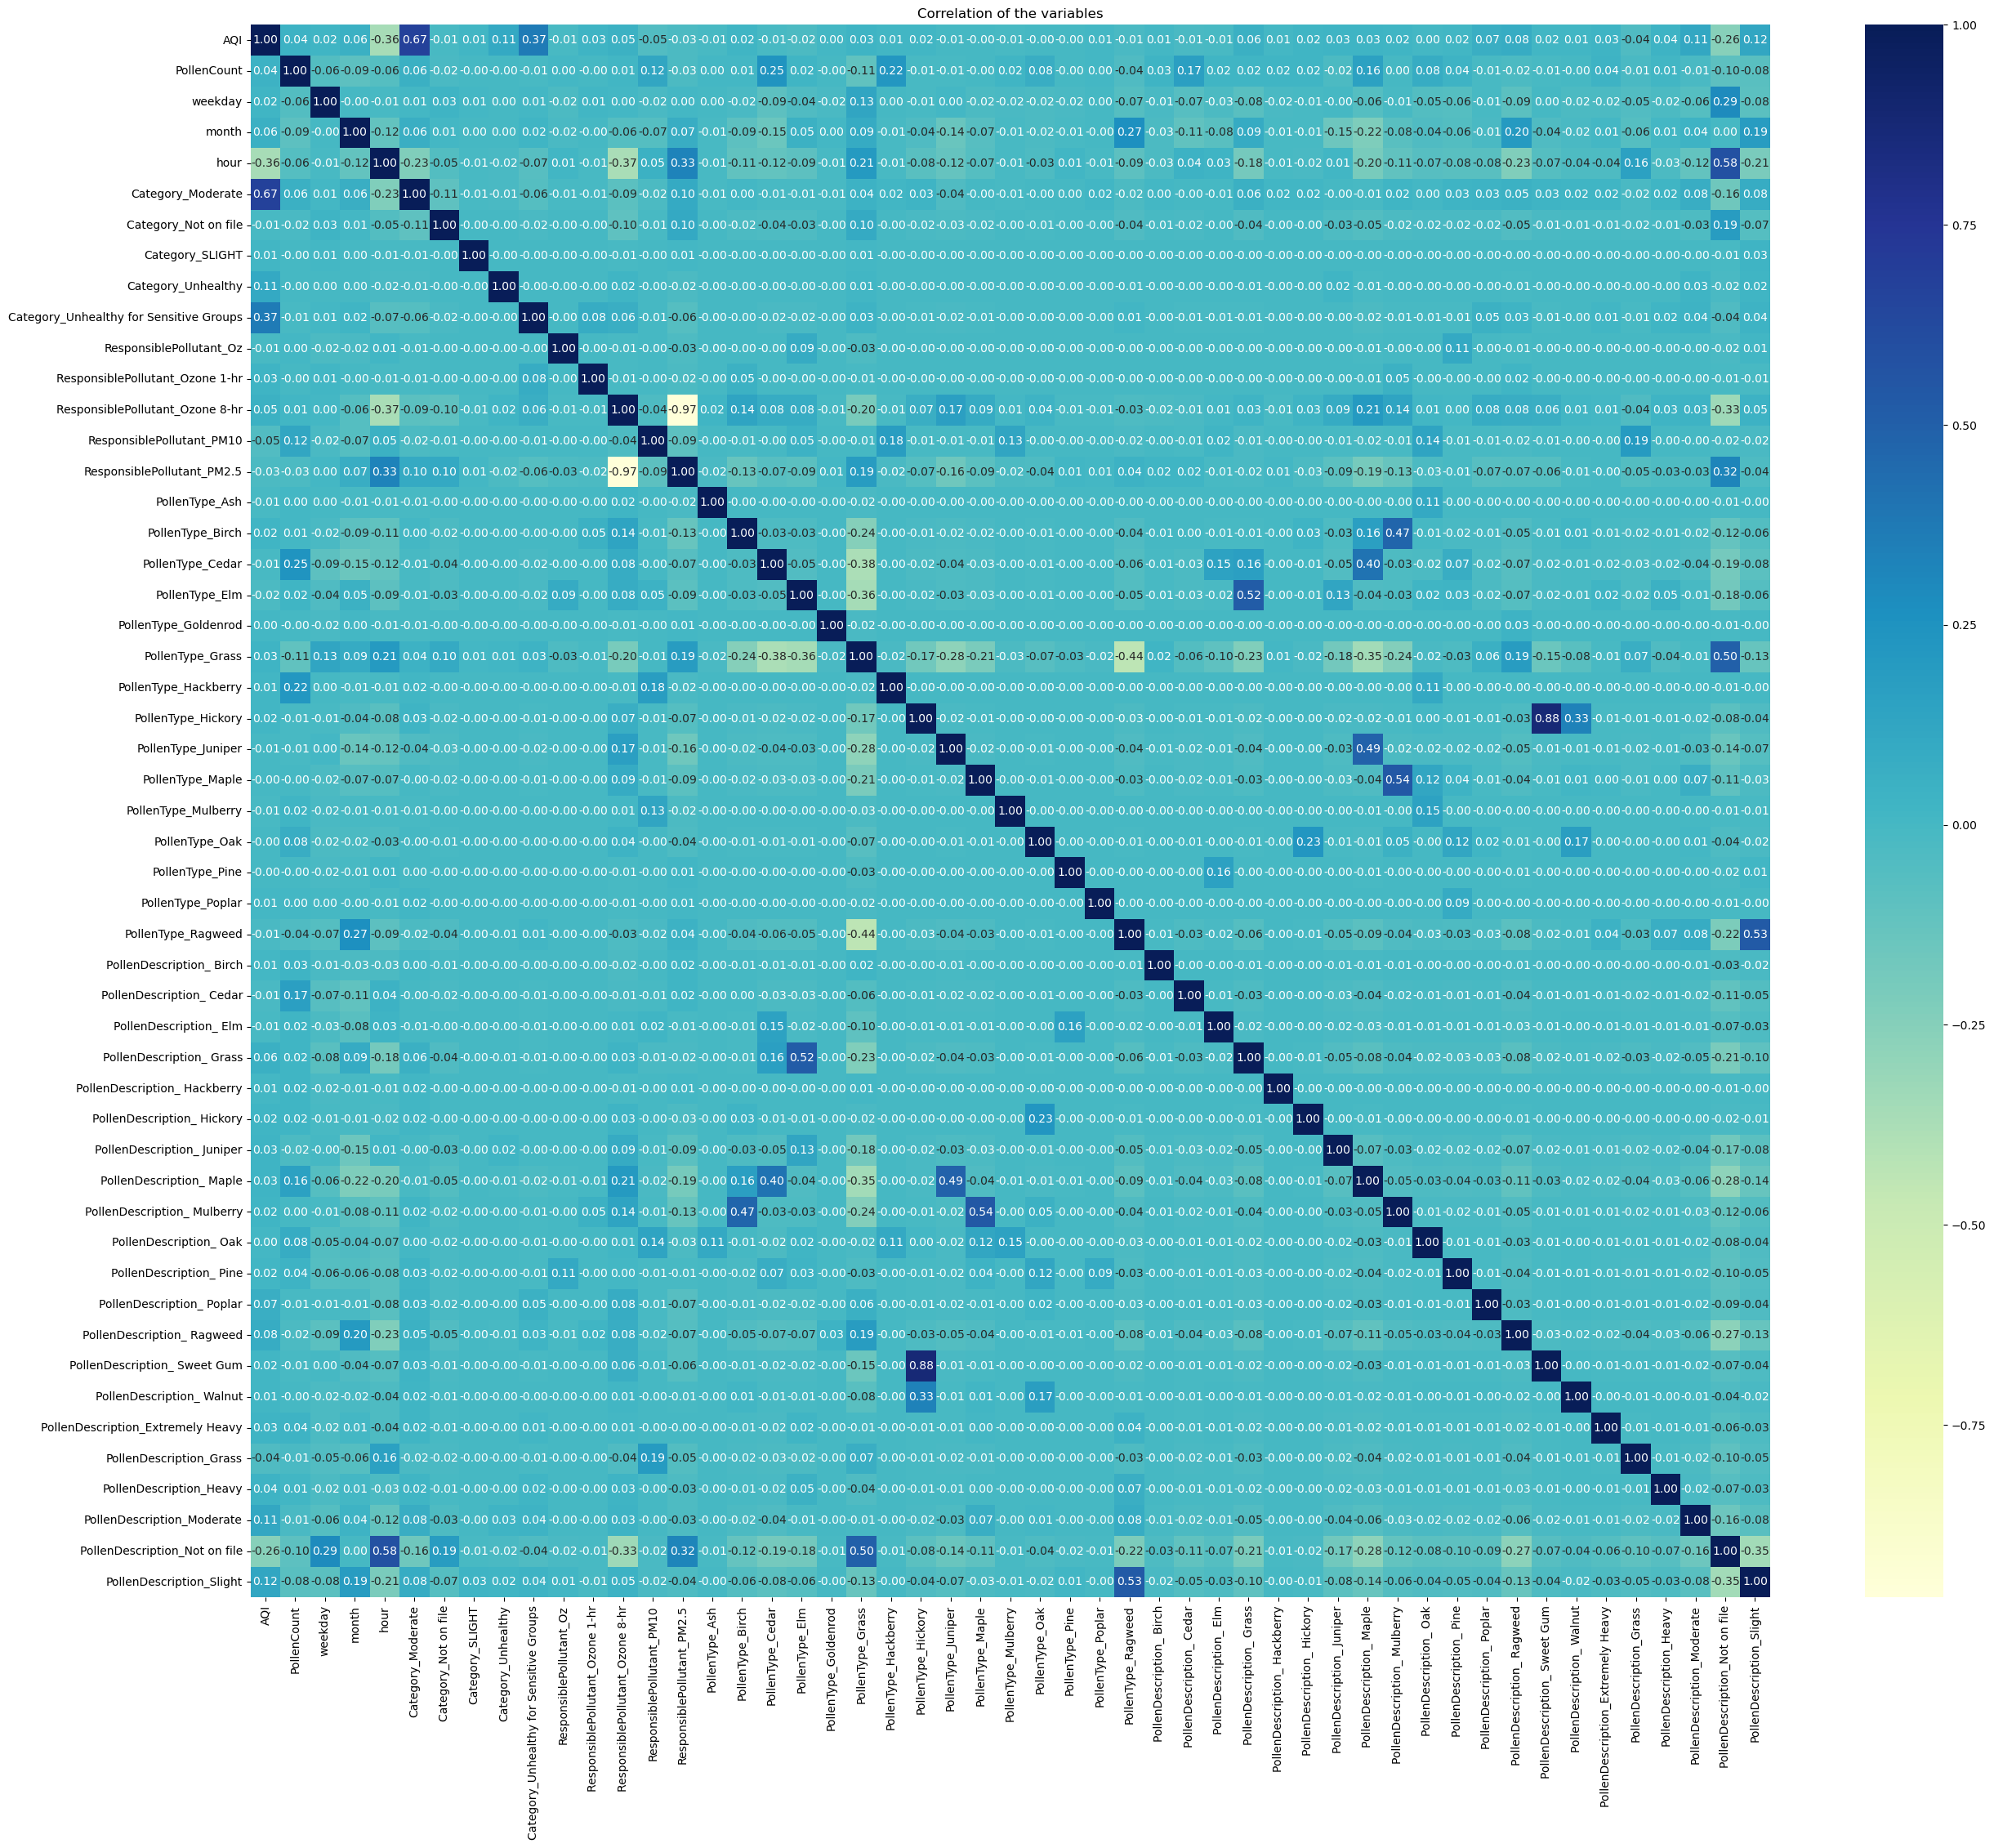

In [19]:
# Ploting a correlation matrix to see the correlation of the columns 
plt.figure(figsize=(30, 25))


corr_graph = sns.heatmap(df.corr(), cmap="YlGnBu", annot=True, fmt=".2f")

plt.title("Correlation of the variables")
plt.show()

# Avoiding data redundancy 

In [18]:
# Removing variables that have high correlation with other variables
# and a weaker correlation with the target variable 'PollenCount'

# Dropping 'ResponsiblePollutant_PM2.5' and 'PollenDescription_Sweet Gum' because:
# 1. 'ResponsiblePollutant_PM2.5' is highly correlated with 'ResponsiblePollutant_Ozone 8-hr'
#    but has a weaker correlation with 'PollenCount'.
# 2. 'PollenDescription_Sweet Gum' is highly correlated with 'PollenType_Hickory'
#    but has a weaker correlation with 'PollenCount'.

df = df.drop(['ResponsiblePollutant_PM2.5','PollenDescription_ Sweet Gum'],axis=1)
df.head(3)

,AQI,PollenCount,weekday,month,hour,Category_Moderate,Category_Not on file,Category_SLIGHT,Category_Unhealthy,Category_Unhealthy for Sensitive Groups,...,PollenDescription_ Pine,PollenDescription_ Poplar,PollenDescription_ Ragweed,PollenDescription_ Walnut,PollenDescription_Extremely Heavy,PollenDescription_Grass,PollenDescription_Heavy,PollenDescription_Moderate,PollenDescription_Not on file,PollenDescription_Slight
0,74.0,3.0,5,7,5,True,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
1,64.0,4.0,4,7,5,True,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
2,55.0,3.0,3,7,5,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True


### All variables in scatter plot

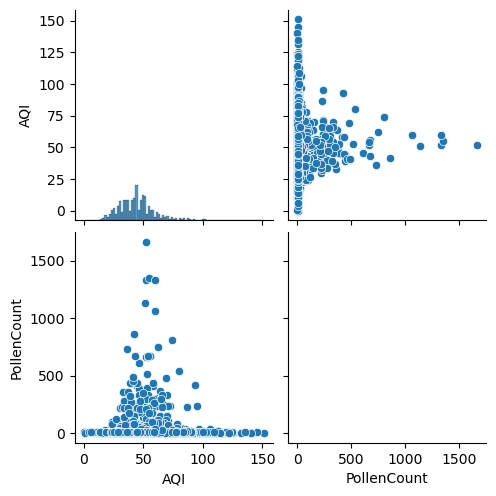

In [19]:
numerical = ['AQI', 'PollenCount']
sns.pairplot(df[numerical], kind="scatter")

## BoxPlots 

### Creating BoxPlot to check  for outliers in data

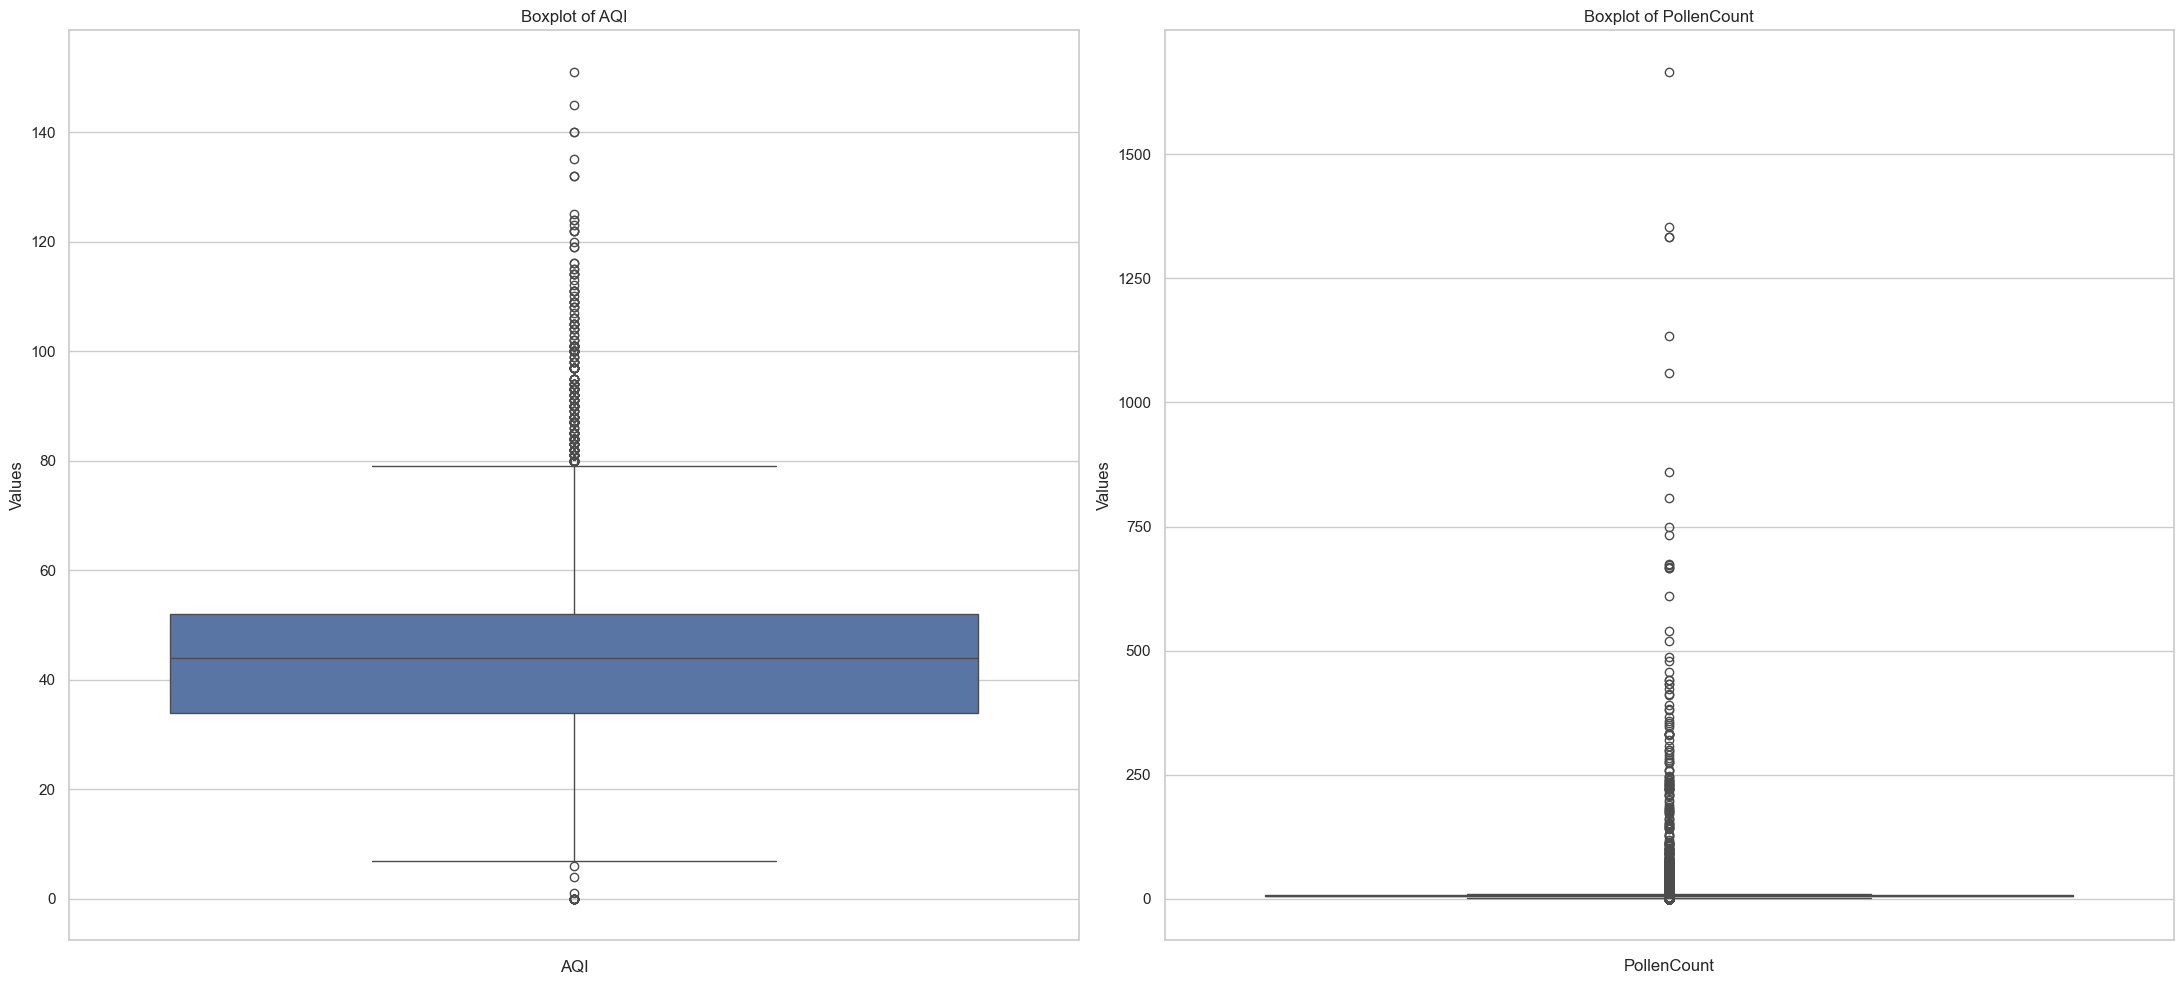

In [22]:
# Using a method to view all box plots individually in a row
sns.set_theme(style="whitegrid")

fig, axes = plt.subplots(1, len(df[numerical].columns), figsize=(22, 10))

for i, col in enumerate(df[numerical].columns):
    sns.boxplot(data=df[col], ax=axes[i])
    axes[i].set_title(f'Boxplot of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Values')

plt.tight_layout()

plt.show()


# Outliers Treatment

## Handling outliers

### Percentile method


In [20]:
# Function to handle outliers with percentile method

def handling_outliers(df, low_percentile=2, high_percentile=95):
    for col in df[numerical].columns:
        low = np.percentile(df[col], low_percentile)
        high = np.percentile(df[col], high_percentile)
        df[col] = np.clip(df[col], low, high)
    return df

df = handling_outliers(df)

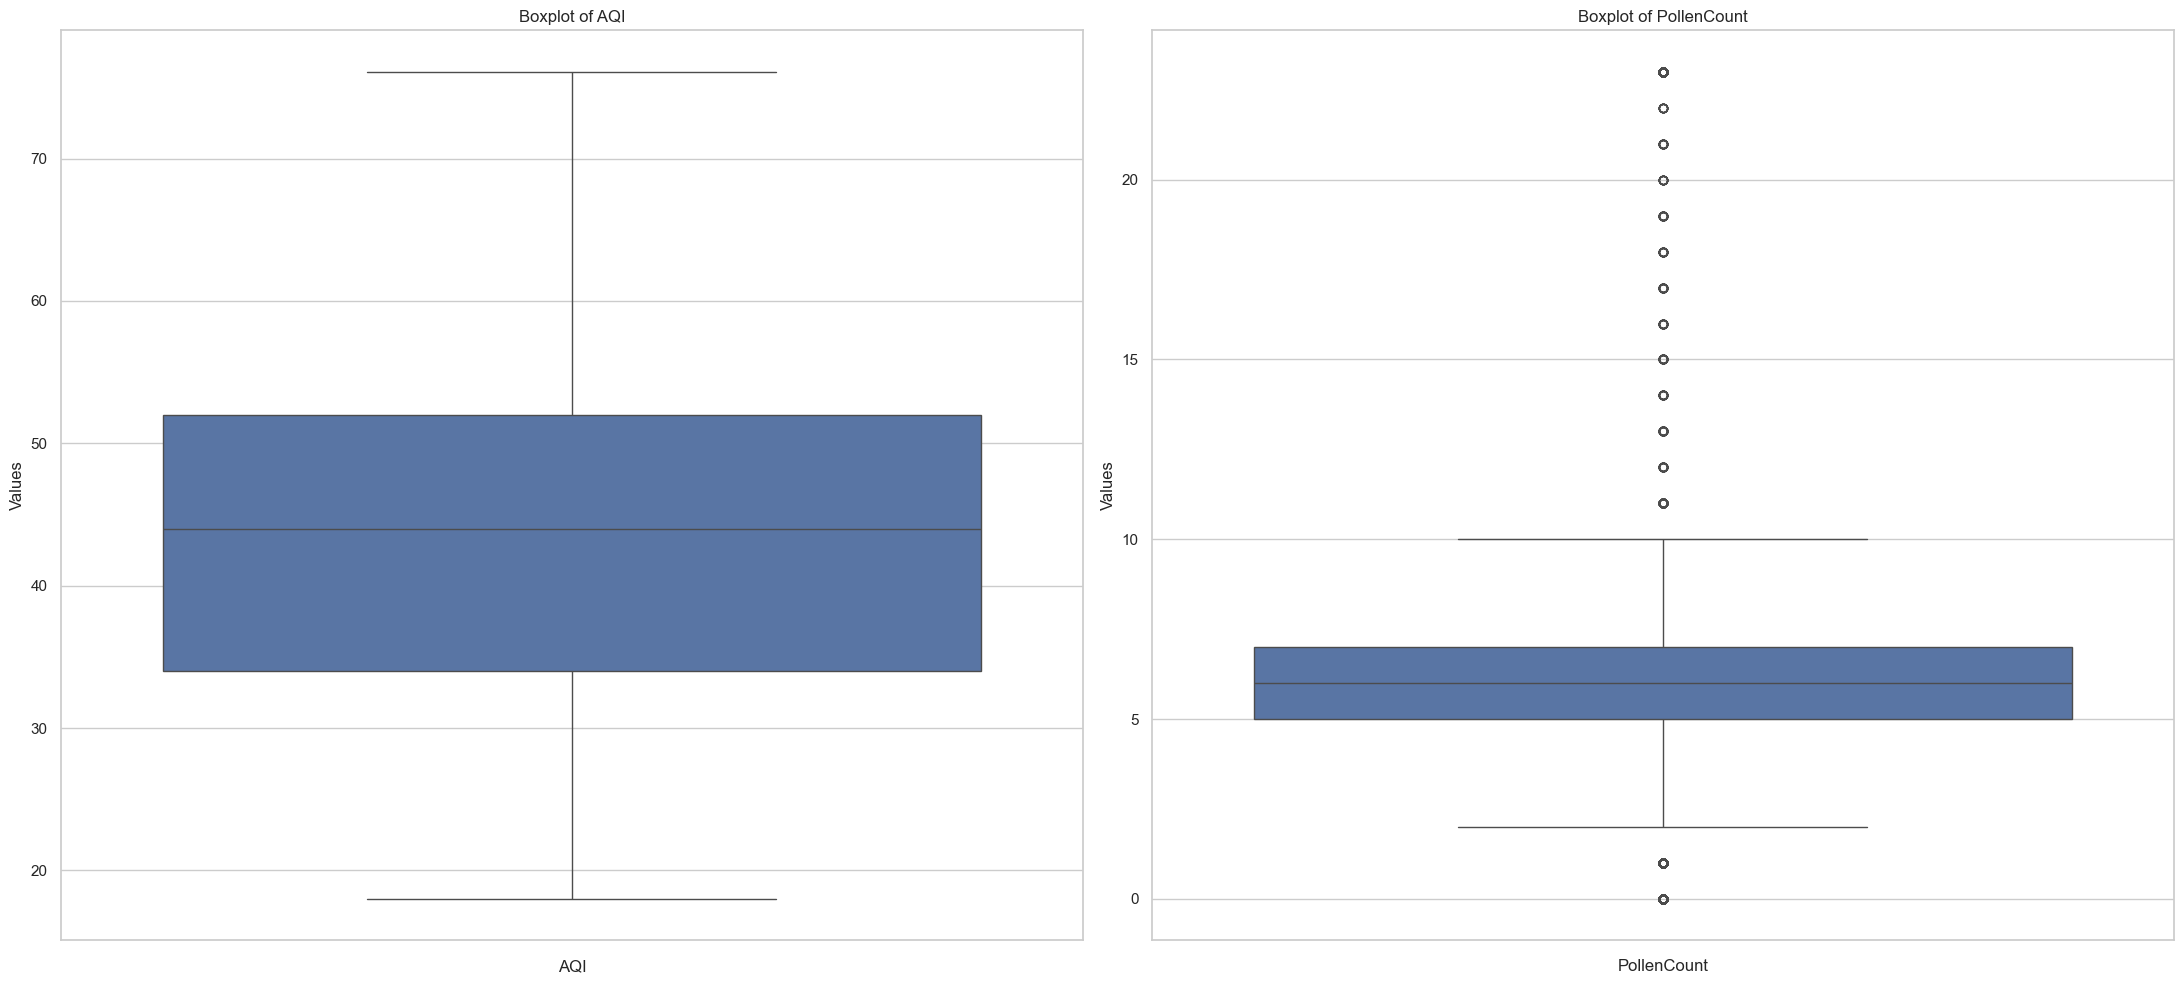

In [21]:
# Using a method to view all box plots individually in a row
sns.set_theme(style="whitegrid")

fig, axes = plt.subplots(1, len(df[numerical].columns), figsize=(22, 10))

for i, col in enumerate(df[numerical].columns):
    sns.boxplot(data=df[col], ax=axes[i])
    axes[i].set_title(f'Boxplot of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Values')

plt.tight_layout()

plt.show()


# Train Test Split

In [22]:
# Initialize a dictionary to store model performance scores
model_scores = {}

# Prepare feature matrix X and target vector y for model training and evaluation
X = df.drop('PollenCount',axis=1)
y = df['PollenCount']

#y = y.astype(int)

In [23]:
X_train,X_test ,y_train,y_test = train_test_split(X, y , test_size=0.2, random_state=0)

In [24]:
y_train.value_counts()

PollenCount
6.0     3272
3.0      431
1.0      371
23.0     343
5.0      321
4.0      318
8.0      314
2.0      293
7.0      291
9.0      262
10.0     217
0.0      189
11.0      82
13.0      34
12.0      28
19.0      27
17.0      24
15.0      23
18.0      18
21.0      18
16.0      18
14.0      17
20.0      10
22.0       6
Name: count, dtype: int64

In [25]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42, k_neighbors=4)

# Apply SMOTE to the training data
X_train, y_train = smote.fit_resample(X_train, y_train)
y_train.value_counts()

PollenCount
6.0     3272
14.0    3272
22.0    3272
15.0    3272
19.0    3272
17.0    3272
21.0    3272
20.0    3272
11.0    3272
13.0    3272
1.0     3272
5.0     3272
4.0     3272
18.0    3272
23.0    3272
12.0    3272
3.0     3272
2.0     3272
8.0     3272
7.0     3272
9.0     3272
0.0     3272
10.0    3272
16.0    3272
Name: count, dtype: int64

In [26]:
print(f"Lenght of: \n X_train:{len(X_train)}\n X_test:{len(X_test)} \n y_train: {len(y_train)} \n y_test: {len(y_test)} ")

Lenght of: 
 X_train:78528
 X_test:1732 
 y_train: 78528 
 y_test: 1732 


# Training the Models

## Random Forest with Grid Search

In [27]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

model_rf = RandomForestClassifier(random_state=42)

### Using grid search cv to get the best parameters

In [169]:
params_grid_rf = {
    "n_estimators": [750],          
    "min_samples_split": [5, 11, 33],                   
    "max_depth": [2, 10, None],                     
    "min_samples_leaf": [1, 2, 4]  
}

In [170]:
grid_search_rf = GridSearchCV(model_rf,params_grid_rf,n_jobs=12,cv=3,verbose=3)
grid_search_rf.fit(X_train,y_train)

Fitting 3 folds for each of 36 candidates, totalling 108 fits


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
31 fits failed out of a total of 108.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
17 fits failed with the following error:
Traceback (most recent call last):
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py", line 1474, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py", line 489, in fit
    trees = Parallel

GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42), n_jobs=12,
             param_grid={'max_depth': [2, 10, 25, None],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [5, 11, 33],
                         'n_estimators': [750]},
             verbose=3)

In [171]:
y_pred = grid_search_rf.predict(X_test)

# Evaluate the accuracy of the classifier
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print(f"Classification Accuracy: {accuracy * 100:.2f}%")

Classification Accuracy: 58.55%


### Ploting the results

In [164]:
table_grid_search(grid_search_rf,all_ranks=True)

,rank_test_score,mean_test_score,mean_fit_time,mean_score_time,param_max_depth,param_min_samples_leaf,param_min_samples_split,param_n_estimators
42,1,0.859451,36.243839,8.443761,None,4,5,500
43,2,0.853288,35.425892,8.719222,None,4,11,500
38,3,0.848856,35.559020,9.584089,None,1,33,500
30,4,0.846386,34.239938,9.925504,25,4,5,500
31,5,0.841598,33.909650,10.028554,25,4,11,500
41,6,0.835243,35.845617,9.630697,None,2,33,500
29,7,0.824725,34.838172,9.791418,25,2,33,500
46,8,0.817848,30.231867,4.651758,None,6,11,500
45,8,0.817848,31.534267,7.639979,None,6,5,500
33,10,0.808234,31.936087,9.257622,25,6,5,500


### Saving the model

In [165]:
import joblib
# save
joblib.dump(grid_search_rf, "./models/random_forest3.joblib")

['./models/random_forest3.joblib']

In [ ]:
# load, no need to initialize the loaded_rf
loaded_rf = joblib.load("./random_forest.joblib")

In [138]:
grid_search_rf.best_params_

{'max_depth': 20, 'min_samples_split': 33, 'n_estimators': 4000}

In [52]:
best_params_rf = {'max_depth': 20, 'min_samples_split':42, 'n_estimators': 4000, 'n_jobs': -1, 
                  'random_state': 42}

model_rf_best = RandomForestClassifier(**best_params_rf)
model_rf_best.fit(X_train,y_train)

RandomForestClassifier(max_depth=20, min_samples_split=42, n_estimators=4000,
                       n_jobs=-1, random_state=42)

### Evaluate the performance of the model to understand its accuracy and reliability

In [82]:
confusion_rf = evaluate_model(model_rf_best, X_train, X_test, y_train, y_test, 'Random Forest Tree')


Random Forest Tree score:
    
RMSE:
    
Test: 37.04745958557707
    
Train: 32.93581693100616
    
MAE:
    
Test: 9.72231543624161
    
Train: 8.15520134228188
    
R²:
    
Test: -0.6748557096762473
    
Train: -0.08956642880742427


# Boosting the model with Xgb Boost and Random Search

## Xgb Random Forest

In [29]:
from xgboost import XGBRFClassifier, XGBClassifier ,plot_importance,plot_tree
from sklearn.model_selection import RandomizedSearchCV , GridSearchCV

In [47]:
#### Prameter Tuning

#1. General Parameters: Guide the overall functioning
#2. Booster Parameters: Guide the individual booster (tree/regression) at each step
#3. Learning Task Parameters: Guide the optimization performed

### Training the model 

#### Choosing the best Xgb model to make deep hyperparameter tuning

##### Testing the Normal Xgb Model

In [106]:
params = {"objective": "multi:softprob", 'random_state': 42}

In [107]:
model_xgb = XGBClassifier(**params)
model_xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [108]:
y_pred_test, y_pred_train = evaluate_model(model_xgb, X_train, X_test, y_train, y_test, 'Xgb Boosting')


Xgb Boosting Performance Metrics:

Test Set Metrics:
Accuracy: 0.575635103926097
Precision: 0.6042532731552457
Recall: 0.575635103926097
F1 Score: 0.5884510800007032

Train Set Metrics:
Accuracy: 0.9118276283618582
Precision: 0.9114773676898179
Recall: 0.9118276283618582
F1 Score: 0.9113043910774974


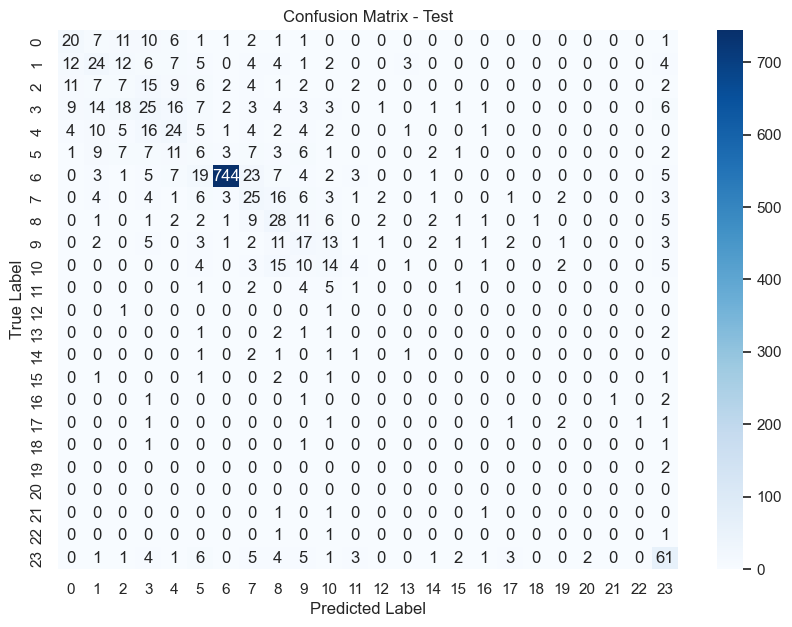

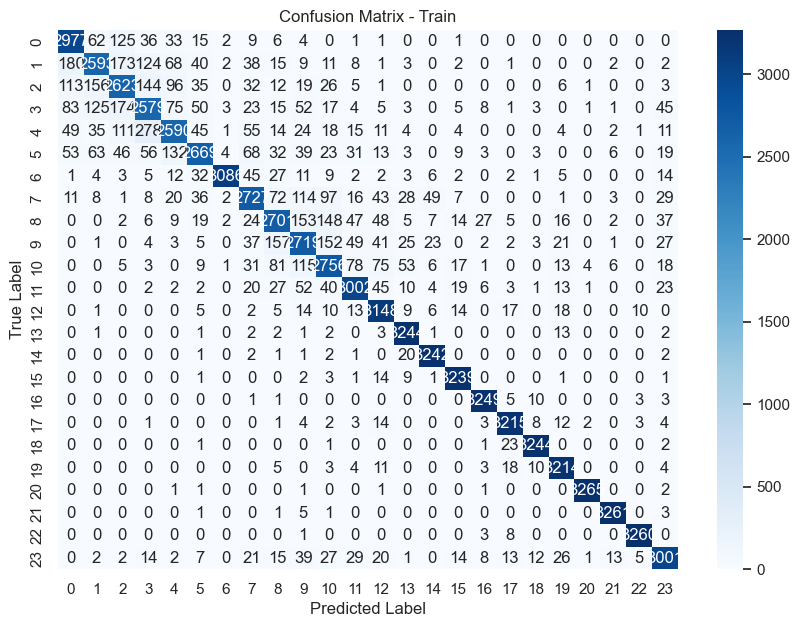

In [49]:
class_names = model_xgb.classes_
plot_confusion_matrices(y_test, y_pred_test, y_train, y_pred_train, class_names)

### Testing the Random Forest Xgb Model

In [88]:
model_xgb2_rf = XGBRFClassifier(random_state=42)
model_xgb2_rf.fit(X_train, y_train)

XGBRFClassifier(base_score=None, booster=None, callbacks=None,
                colsample_bylevel=None, colsample_bytree=None, device=None,
                early_stopping_rounds=None, enable_categorical=False,
                eval_metric=None, feature_types=None, gamma=None,
                grow_policy=None, importance_type=None,
                interaction_constraints=None, max_bin=None,
                max_cat_threshold=None, max_cat_to_onehot=None,
                max_delta_step=None, max_depth=None, max_leaves=None,
                min_child_weight=None, missing=nan, monotone_constraints=None,
                multi_strategy=None, n_estimators=None, n_jobs=None,
                num_parallel_tree=None, objective='multi:softprob',
                random_state=42, reg_alpha=None, ...)

In [89]:
y_pred_test, y_pred_train = evaluate_model(model_xgb2_rf, X_train, X_test, y_train, y_test, 'Xgb Random Forest')


Xgb Random Forest Performance Metrics:

Test Set Metrics:
Accuracy: 0.5623556581986143
Precision: 0.6278399684377033
Recall: 0.5623556581986143
F1 Score: 0.5882150877797777

Train Set Metrics:
Accuracy: 0.6296480236348818
Precision: 0.638277650536881
Recall: 0.6296480236348818
F1 Score: 0.6255422897228786


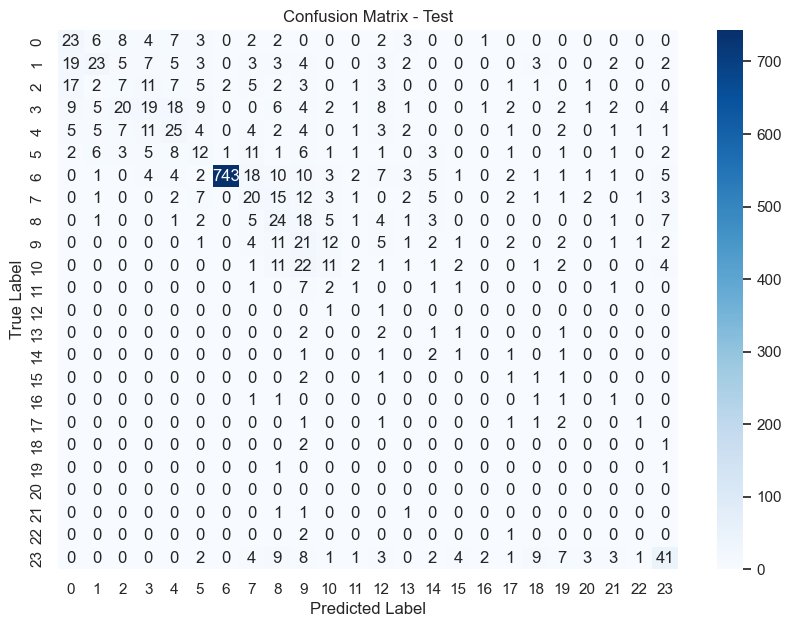

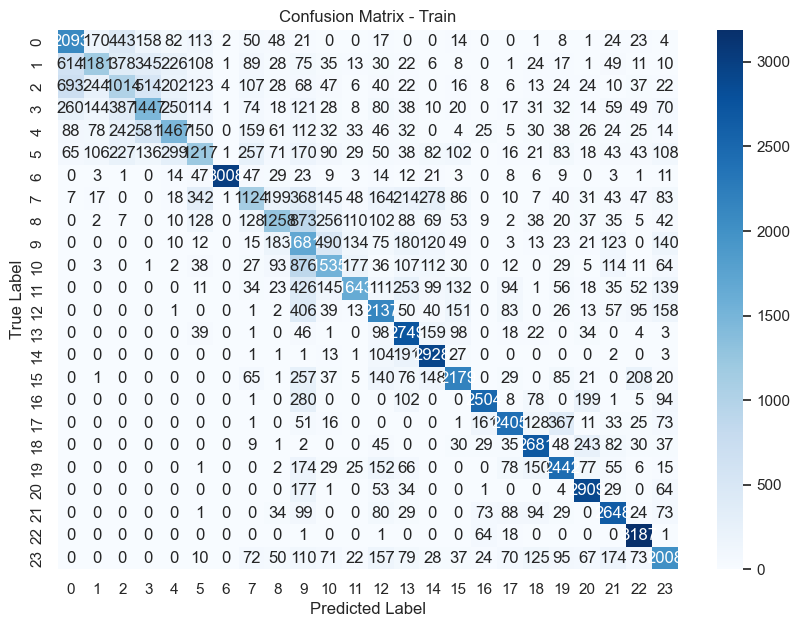

In [52]:
class_names = model_xgb2_rf.classes_
plot_confusion_matrices(y_test, y_pred_test, y_train, y_pred_train, class_names)

#### The standard XGBoost model seems to be overfitting and doesn't perform as well in terms of accuracy, precision, and overall performance, However the Random Forest model exhibits greater accuracy and dependability in forecasting outcomes compared to the XGBoost model.

#### So because of that i will choose the Xgb Random Forest to do my deep search


## Deep Tuning in the best Xgb model

In [113]:
VERBOSE = 3
N_JOBS = -1

params = {"objective": "multi:softprob", "tree_method": "hist", 'random_state': 42}

model_xgb_rf_test = XGBClassifier(**params)

## Tuning the max_depth and min_child_weight params

In [125]:
param_test1 = {
    'max_depth':range(1,4,1),
    'min_child_weight':range(1,4,1),
    'n_estimators': [30,50,100],
    'eta' : [0.1]
}

grid_rf_xgb1 = RandomizedSearchCV(model_xgb_rf_test, param_test1, cv=3, n_iter=10, verbose=VERBOSE, n_jobs=N_JOBS ,scoring='accuracy',random_state=42)
grid_rf_xgb1.fit(X_train, y_train)



Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                           max_leaves=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           multi_strategy=None,
                                           n_estimators=None, n_jobs=None,
                                           num_parallel_tree=None,
                                           objective='multi:softprob', ...),
                   n_jobs=-1,
                   param_distributions={'eta': [0.1], 'max_depth': range(1, 4),
                                        'min_child_weight': range(1, 4),
                                        'n_estimators': [30, 50, 100]},
                   random_state=42, scoring='accuracy', verbose=3)

#### Score

In [126]:
y_pred_test, y_pred_train = evaluate_model(grid_rf_xgb1, X_train, X_test, y_train, y_test, 'Xgb Random Forest')

Xgb Random Forest Performance Metrics:

Test Set Metrics:
Accuracy: 0.569284064665127
Precision: 0.6187246598611809
Recall: 0.569284064665127
F1 Score: 0.5880267771412464

Train Set Metrics:
Accuracy: 0.5192415444172779
Precision: 0.5355850679318465
Recall: 0.5192415444172779
F1 Score: 0.5110804431741021


### Ploting the results

#### Table

In [86]:
table_grid_search(grid_rf_xgb1,all_ranks=True)

,rank_test_score,mean_test_score,mean_fit_time,mean_score_time,param_n_estimators,param_min_child_weight,param_max_depth
41,1,0.758952,116.439822,14.558354,300,1,9
2,2,0.737546,40.373742,6.465701,100,2,9
15,3,0.720444,45.783444,7.522004,100,1,8
10,4,0.708563,116.710953,20.232101,300,2,8
20,5,0.708486,169.377092,32.461632,400,4,9
17,6,0.696541,36.276509,5.906558,100,3,8
36,7,0.684533,154.047018,25.112780,400,4,8
4,8,0.675925,63.785890,7.913689,200,1,7
34,9,0.675835,145.306285,20.074684,400,1,7
13,10,0.669175,166.087544,29.475618,400,7,9


## Tuning the gamma param

In [90]:
params = {"objective": "multi:softprob", "tree_method": "hist", 'random_state': 42}

model_xgb_rf_test2 = XGBRFClassifier()
param_test2 = {
 'gamma':[i/10.0 for i in range(0,5)]
        
}

grid_rf_xgb2 = GridSearchCV(model_xgb_rf_test2, param_test2, cv=3, verbose=VERBOSE, n_jobs=N_JOBS ,scoring='accuracy')
grid_rf_xgb2.fit(X_train, y_train)

Fitting 3 folds for each of 5 candidates, totalling 15 fits


GridSearchCV(cv=3,
             estimator=XGBRFClassifier(base_score=None, booster=None,
                                       callbacks=None, colsample_bylevel=None,
                                       colsample_bytree=None, device=None,
                                       early_stopping_rounds=None,
                                       enable_categorical=False,
                                       eval_metric=None, feature_types=None,
                                       gamma=None, grow_policy=None,
                                       importance_type=None,
                                       interaction_constraints=None,
                                       max_bin=None, max_cat_threshold=None,
                                       max_cat_to_onehot=None,
                                       max_delta_step=None, max_depth=None,
                                       max_leaves=None, min_child_weight=None,
                                       missing=nan, monotone_constraints=None,
                                       multi_strategy=None, n_estimators=None,
                                       n_jobs=None, num_parallel_tree=None,
                                       objective='binary:logistic',
                                       random_state=None, reg_alpha=None, ...),
             n_jobs=-1, param_grid={'gamma': [0.0, 0.1, 0.2, 0.3, 0.4]},
             scoring='accuracy', verbose=3)

### Ploting the results
#### Remember to see the interactive plot you need to run this again

#### Table

In [95]:
table_grid_search(grid_rf_xgb2,all_ranks=True)

,rank_test_score,mean_test_score,mean_fit_time,mean_score_time,param_gamma
2,1,0.621205,31.820438,2.293858,0.2
3,1,0.621205,31.899232,2.202251,0.3
4,3,0.620950,31.997166,2.064841,0.4
1,4,0.620556,32.493155,1.952341,0.1
0,5,0.620237,33.115272,1.701745,0.0


#### Score

In [96]:
y_pred_test, y_pred_train = evaluate_model(grid_rf_xgb2, X_train, X_test, y_train, y_test, 'Xgb Random Forest')

Xgb Random Forest Performance Metrics:

Test Set Metrics:
Accuracy: 0.5606235565819861
Precision: 0.6242663584251369
Recall: 0.5606235565819861
F1 Score: 0.5857102867292485

Train Set Metrics:
Accuracy: 0.6341559698451508
Precision: 0.6433317283848924
Recall: 0.6341559698451508
F1 Score: 0.6300133209918004


## Tuning the reg_alpha and reg_lambda param

In [97]:
params = {"objective": "multi:softprob", "tree_method": "hist", 'random_state': 42}

model_xgb_rf_test3 = XGBRFClassifier()

param_test3 = {
'reg_alpha':[1e-2, 0.1, 0.5, 0.8],
'reg_lambda':[1e-2, 0.1, 0.5, 0.8]
}

grid_rf_xgb3 = GridSearchCV(model_xgb_rf_test3, param_test3, cv=5, verbose=VERBOSE, n_jobs=N_JOBS ,scoring='accuracy')
grid_rf_xgb3.fit(X_train, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


GridSearchCV(cv=5,
             estimator=XGBRFClassifier(base_score=None, booster=None,
                                       callbacks=None, colsample_bylevel=None,
                                       colsample_bytree=None, device=None,
                                       early_stopping_rounds=None,
                                       enable_categorical=False,
                                       eval_metric=None, feature_types=None,
                                       gamma=None, grow_policy=None,
                                       importance_type=None,
                                       interaction_constraints=None,
                                       max_bin=None, max_cat_threshold=None,
                                       max...
                                       max_delta_step=None, max_depth=None,
                                       max_leaves=None, min_child_weight=None,
                                       missing=nan, monotone_constraints=None,
                                       multi_strategy=None, n_estimators=None,
                                       n_jobs=None, num_parallel_tree=None,
                                       objective='binary:logistic',
                                       random_state=None, reg_alpha=None, ...),
             n_jobs=-1,
             param_grid={'reg_alpha': [0.01, 0.1, 0.5, 0.8],
                         'reg_lambda': [0.01, 0.1, 0.5, 0.8]},
             scoring='accuracy', verbose=3)

In [98]:
y_pred_test, y_pred_train = evaluate_model(grid_rf_xgb3, X_train, X_test, y_train, y_test, 'Xgb Random Forest')

Xgb Random Forest Performance Metrics:

Test Set Metrics:
Accuracy: 0.5635103926096998
Precision: 0.6272299480629047
Recall: 0.5635103926096998
F1 Score: 0.5888491750617828

Train Set Metrics:
Accuracy: 0.6304248166259169
Precision: 0.6391436584281864
Recall: 0.6304248166259169
F1 Score: 0.626109465744065


#### Table

In [81]:
table_grid_search(grid_rf_xgb3,all_ranks=True)

,rank_test_score,mean_test_score,mean_fit_time,mean_score_time,param_reg_alpha,param_reg_lambda
1,1,0.621766,42.837576,2.120532,0.01,0.1
12,2,0.621702,44.442761,2.855676,0.8,0.01
4,3,0.621320,41.797526,2.355354,0.1,0.01
9,4,0.621065,43.526503,2.532015,0.5,0.1
0,5,0.621002,42.603006,2.166573,0.01,0.01
5,6,0.620823,43.827418,2.460766,0.1,0.1
13,7,0.620671,40.934504,2.064020,0.8,0.1
2,8,0.620581,43.106800,2.053368,0.01,0.5
10,9,0.619817,41.249644,2.457301,0.5,0.5
8,10,0.619664,43.227236,2.570966,0.5,0.01


## Tuning the colsample_bynode and colsample_bytree params

#### Since this is the parameter that affects the model the most, I will conduct a deep search on it

##### First, I will tune the model to get the best precision values.

In [130]:
params = {'random_state': 42, 'learning_rate': 0.10}

model_xgb_rf_test4 = XGBRFClassifier(**params)    
param_test4 = {
 'colsample_bynode':[i/100.0 for i in range(5,101,5)],
 'colsample_bytree':[i/100.0 for i in range(5,101,5)]
}

grid_rf_xgb4 = RandomizedSearchCV(model_xgb_rf_test4, param_test4, cv=5, verbose=VERBOSE, n_jobs=N_JOBS ,scoring='accuracy')
grid_rf_xgb4.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5,
                   estimator=XGBRFClassifier(base_score=None, booster=None,
                                             callbacks=None,
                                             colsample_bylevel=None,
                                             colsample_bytree=None, device=None,
                                             early_stopping_rounds=None,
                                             enable_categorical=False,
                                             eval_metric=None,
                                             feature_types=None, gamma=None,
                                             grow_policy=None,
                                             importance_type=None,
                                             interaction_constraints=None,
                                             learning_rate=0.1, max_bin=None,
                                             ma...
                                             num_parallel_tree=None,
                                             objective='binary:logistic',
                                             random_state=42, ...),
                   n_jobs=-1,
                   param_distributions={'colsample_bynode': [0.05, 0.1, 0.15,
                                                             0.2, 0.25, 0.3,
                                                             0.35, 0.4, 0.45,
                                                             0.5, 0.55, 0.6,
                                                             0.65, 0.7, 0.75,
                                                             0.8, 0.85, 0.9,
                                                             0.95, 1.0],
                                        'colsample_bytree': [0.05, 0.1, 0.15,
                                                             0.2, 0.25, 0.3,
                                                             0.35, 0.4, 0.45,
                                                             0.5, 0.55, 0.6,
                                                             0.65, 0.7, 0.75,
                                                             0.8, 0.85, 0.9,
                                                             0.95, 1.0]},
                   scoring='accuracy', verbose=3)

#### Table

In [133]:
table_grid_search(grid_rf_xgb4,all_ranks=True)

,rank_test_score,mean_test_score,mean_fit_time,mean_score_time,param_colsample_bynode,param_colsample_bytree
334,1,0.253277,0.104224,0.020004,0.85,0.75
314,2,0.252229,0.107627,0.019001,0.8,0.75
294,3,0.252123,0.101423,0.018004,0.75,0.75
354,4,0.252072,0.100223,0.019404,0.9,0.75
374,5,0.251309,0.105424,0.018804,0.95,0.75
...,...,...,...,...,...,...
1,388,0.037900,1.675241,0.018404,0.05,0.1
63,397,0.034509,0.100422,0.019204,0.2,0.2
43,397,0.034509,0.106424,0.018204,0.15,0.2
23,397,0.034509,0.106823,0.018404,0.1,0.2


#### Score

In [134]:
confusion_xgb_rf_4 = evaluate_model(grid_rf_xgb4, X_train, X_test, y_train, y_test, 'XGBoost')

XGBoost score:
    
RMSE:
    
Test: 4.9261215135250715
    
Train: 5.313319337437526
    
MAE:
    
Test: 2.8509011517900564
    
Train: 3.0666388305997723
    
R²:
    
Test: 0.22534554237451698
    
Train: 0.25806621827335263


#### Then, I will tune the model to get the best accuracy values.

In [120]:
params = {'learning_rate': 1, 'num_parallel_tree': 10, "objective": "binary:logistic", 
          "tree_method": "hist", 'min_child_weight': 1, 'reg_alpha': 0.5, 'reg_lambda': 0.01, 'max_depth':2, 'random_state': 42}

model_xgb_rf_test5 = XGBRFClassifier(**params)   

param_test5 = {
 'colsample_bynode':[i/100.0 for i in range(5,101,5)],
 'colsample_bytree':[i/100.0 for i in range(5,101,5)]
}

grid_rf_xgb5 = GridSearchCV(model_xgb_rf_test5, param_test5, cv=5, verbose=VERBOSE, n_jobs=N_JOBS ,scoring='accuracy')
grid_rf_xgb5.fit(X_train, y_train)

Fitting 5 folds for each of 400 candidates, totalling 2000 fits


GridSearchCV(cv=5,
             estimator=XGBRFClassifier(base_score=None, booster=None,
                                       callbacks=None, colsample_bylevel=None,
                                       colsample_bytree=None, device=None,
                                       early_stopping_rounds=None,
                                       enable_categorical=False,
                                       eval_metric=None, feature_types=None,
                                       gamma=None, grow_policy=None,
                                       importance_type=None,
                                       interaction_constraints=None,
                                       learning_rate=1, max_bin=None,
                                       max_cat_th...
                                       n_jobs=None, num_parallel_tree=10,
                                       objective='binary:logistic',
                                       random_state=42, ...),
             n_jobs=-1

#### Table

In [133]:
table_grid_search(grid_rf_xgb4,all_ranks=True)

,rank_test_score,mean_test_score,mean_fit_time,mean_score_time,param_colsample_bytree,param_colsample_bynode
5,1,0.653691,42.721359,2.255614,0.55,1.0
4,2,0.639301,40.574300,2.333792,0.85,0.7
3,3,0.635519,42.947069,2.825437,0.65,0.65
9,4,0.630934,26.241602,0.634144,0.95,0.85
0,5,0.627101,39.345571,2.010759,0.75,0.55
6,6,0.626999,39.262283,2.158886,0.6,0.6
7,7,0.624529,34.075808,1.220675,0.95,0.95
1,8,0.562742,38.983988,1.823315,0.8,0.2
2,9,0.401666,28.309782,1.272491,0.7,0.05
8,10,0.362826,25.476758,0.599735,0.1,0.35


#### Score

In [134]:
y_pred_test, y_pred_train = evaluate_model(grid_rf_xgb4, X_train, X_test, y_train, y_test, 'Xgb Random Forest')

Xgb Random Forest Performance Metrics:

Test Set Metrics:
Accuracy: 0.5715935334872979
Precision: 0.6229275122162172
Recall: 0.5715935334872979
F1 Score: 0.5923454361818187

Train Set Metrics:
Accuracy: 0.6665265892420538
Precision: 0.6722897612473655
Recall: 0.6665265892420538
F1 Score: 0.6557680535220863


## Best Params Xgb Random Forest

#### So i see that the best parameters for accuracy is colsample_bynode=0.85 and colsample_bynode=0.6 and for precision is colsample_bynode=0.05 and colsample_bynode=0.15 

### Initially, I will compute the average performance for both methods. Subsequently, I will systematically adjust the parameters, exploring increments and decrements to achieve optimal scores.
### And with that i will get the best model

In [124]:
#The best model after exploring the values

params = {'learning_rate': 1, 'num_parallel_tree': 10, "objective": "binary:logistic", 'colsample_bynode' :0.35, 'colsample_bytree':0.75,
          "tree_method": "hist", 'min_child_weight': 1, 'reg_alpha': 0.5, 'reg_lambda': 0.01, 'max_depth':2, 'random_state': 42}

model_xgb_rf_best = XGBRFClassifier(**params)
model_xgb_rf_best.fit(X_train,y_train)

confusion_xgb_rf_best = evaluate_model(model_xgb_rf_best, X_train, X_test, y_train, y_test, 'XGBoost Random Forest Best')

XGBoost Random Forest Best score:
    
Accuracy:
    
Test: 0.8368263473053892
    
Train: 0.8254027725739977
    
Precision:
    
Test: 0.8266666666666667
    
Train: 0.8265582655826558
    
ROC:
    
Test: 0.6834574336063539
    
Train: 0.6993902535731948
    
Confusion Matrix:
    
Test:
[[497  13]
 [ 96  62]]
    
Train:
[[1898   64]
 [ 402  305]]


# Ploting the Confusion Matrix and  the feature importance

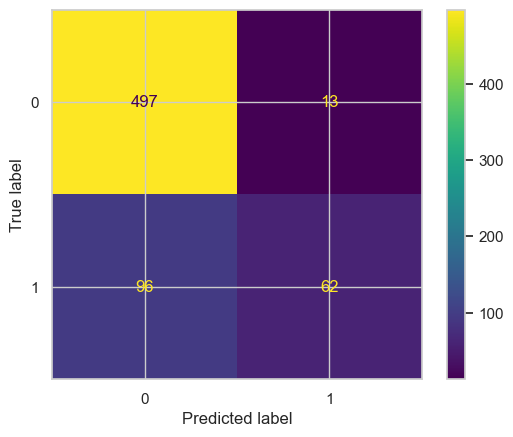

In [125]:
ConfusionMatrixDisplay(confusion_matrix = confusion_xgb_rf_best).plot()

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

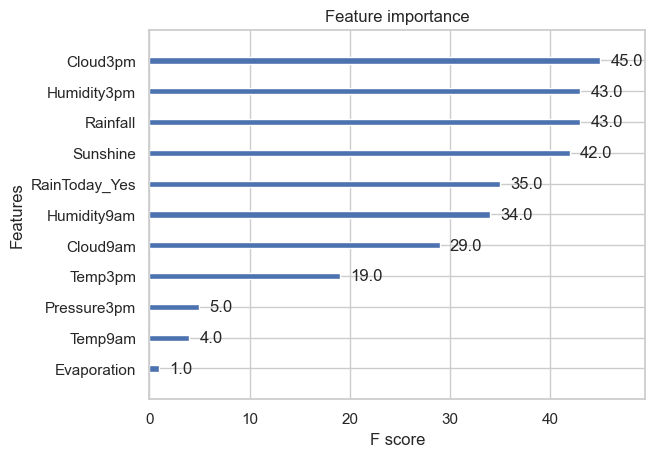

In [126]:
plot_importance(model_xgb_rf_best)

# Questions

## 1 - Your views about the problem statement?
The problem statement given by "The Daily Buzz" is an example of a classification problem. The company was founded many years ago and is now struggling to attract more readers. To get more readers, they need to innovate and stay ahead of the competition.
To address this, they will start a new column called "The Weather Oracle" to predict the weather for the coming days. Predicting rainfall accurately is a classic challenge in meteorology. So, they need me to use historical weather data and advanced machine learning techniques to build models that help the company attract more viewers.
The community will be interested in this because they can plan their activities, from daily commutes to agricultural tasks. I have been hired as an ML expert, and they want me to create an ML model to accurately predict the rainfall in Sydney. I will focus on precision (true negatives) because I believe the most important aspect is predicting if it will not rain today so that people can carry out their daily routines, go to the beach, and so on. If the model predicts rain and it does not rain, it is not a big problem. However, it is a bigger problem if the model predicts that it will not rain and it does rain, as this can lead to people being unprepared for adverse weather, disrupting their plans and potentially causing more significant inconvenience or harm.

## 2 - What will be your approach to solving this task?
First, I will import the librarys and some functions that i will need further,i will import the data and i will make data Processing following this steps:

1-Data verification and visualization: I will use methods such as describe(), df.info, df.shape, and df.isnull to verify the data, check for null values, and identify discrepancies in the data.

2-Replacing Missing Values: For columns with a high number of null values, I will fill them with the median to maintain data consistency without introducing bias, for categorical data, I will fill missing values with the mode, for columns with a lower number of null values, I will fill them with the mean since these values are less likely to interfere with the data significantly.

3-Droping unnecessary columns: After checking the data, i will identify and drop columns that are not needed, such as 'date' and 'location'.

4-Creating Dummies: I will createu dummy variables using pd.get_dummies with ('drop_firt = true') for categorical data because many machine learning algorithms require numerical input, and creating dummies allows us to convert categorical data into a number format that can be provided to these algorithms.

5-Correlation and data redundancy: I will perform a correlation analysis to understand the relationships between different features, this will help me identify which features are most strongly related to the target variable (rainfall prediction) and each other. I will use methods such as df.corr() to calculate the correlation matrix and visualize it with a heatmap.i will drop columns to avoid data redundancy and multicollinearity and also select the most relevant features for the model.

6-Ploting scatter and box plots:I will create scatter plots and box plots to visualize the data distributions and relationships between features. Scatter plots will help identify patterns and relationships between numerical variables, while box plots will help detect the presence of outliers and understand the spread and central tendency of the data.

7-Handling outliers I will identify and handle outliers in the data. Outliers can skew the results and affect the performance of the machine learning model. I will use the percentile method to detect outliers and decide whether to remove them or transform them to minimize their impact on the analysis.

After completing data processing, I'll split the data into training and testing sets, then, for models requiring scaled data i will standardize it using Standard Scaler.

And now i can perform my models such as Logistic regression, Linear Discriminant Analysis, K-Nearest Neighbors and Classification trees.

I will proceed with building models using ensemble and boosting techniques. First, i will construct the models, then i will search for the best hyperparameters using either random search or grid search. Once the best hyperparameters are identified, i will fit the model and plot the results, including a graph for each parameter and a table summarizing the results of the grid search then i will assess the models performance using accuracy, precision, ROC AUC, and confusion matrix for both the training and testing data. This comprehensive evaluation will provide insights into how well the model generalizes to unseen data and its predictive capabilities.


For the model that can perform better, i will conduct a deep search for each hyperparameter to find the best fit, aiming for the highest precision while minimizing changes to the average accuracy. i will prioritize precision because accurately predicting non-rainy days is crucial. However, I don't want the model to drastically decrease its accuracy.i will plot graphs, tables, and scores to visualize and evaluate the results comprehensively


# 3 - What were the available ML model options you had to perform this task
As I mentioned, the task is a Classification problem, so I have the following available options for models: Logistic regression, Linear Discriminant Analysis, K-Nearest Neighbors and Classification trees. For ensemble techniques i have Random Forest, AdaBoost, Gradient Boost, and XGBoost. For hyperparameter tuning, I will use Grid Search or Random Search to find the best parameters.

## 4 - Which model’s performance is best and what could be the possible reason for that?
All of the models perform well but the XGBoost Random Forest stands out with the best performance. Therefore,i conducted a deep search for each hyperparameter to find the best fit aiming for the highest precision while minimizing changes to the average accuracy 
This process involved an extensive grid search and cross-validation to meticulously explore a wide range of hyperparameter values the model achieved the best scores through this thorough optimization

I believe this success is due to the models combination of the strengths of random forests and XGBoost

the random forest component reduces overfitting and improves generalization by averaging multiple decision trees. Meanwhile, the XGBoost boosting aspect incrementally enhances the model, making it more accurate in capturing complex patterns in the data. This deep search for optimal hyperparameters ensured that the model was fine-tuned to provide precise and reliable predictions

You can check the results and the best model below :

In [129]:
#Scores of the best model 
confusion_xgb_rf_best = evaluate_model(model_xgb_rf_best, X_train, X_test, y_train, y_test, 'XGBoost Random Forest Best')

XGBoost Random Forest Best score:
    
Accuracy:
    
Test: 0.8368263473053892
    
Train: 0.8254027725739977
    
Precision:
    
Test: 0.8266666666666667
    
Train: 0.8265582655826558
    
ROC:
    
Test: 0.6834574336063539
    
Train: 0.6993902535731948
    
Confusion Matrix:
    
Test:
[[497  13]
 [ 96  62]]
    
Train:
[[1898   64]
 [ 402  305]]


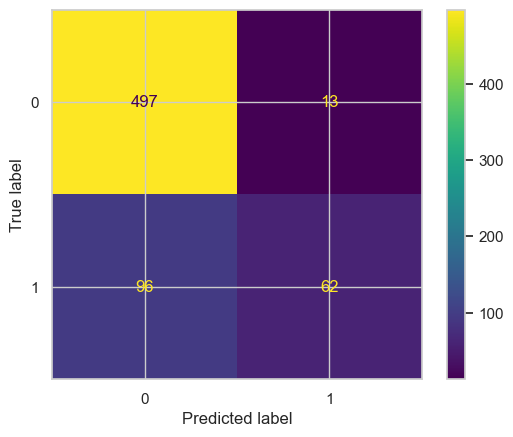

In [132]:
#Confusion Matrix of the best model 
ConfusionMatrixDisplay(confusion_matrix = confusion_xgb_rf_best).plot()


In [133]:
# All the model scores
model_scores

{'Logistic Regression': {'Test': {'Accuracy': 0.8323353293413174,
   'Precision': 0.6916666666666667,
   'ROC': 0.7263837180441798,
   'Confusion Matrix': array([[473,  37],
          [ 75,  83]], dtype=int64)},
  'Train': {'Accuracy': 0.8370176095916073,
   'Precision': 0.7527881040892194,
   'ROC': 0.7525275135639383,
   'Confusion Matrix': array([[1829,  133],
          [ 302,  405]], dtype=int64)}},
 'Linear Discriminant Analysis': {'Test': {'Accuracy': 0.8383233532934131,
   'Precision': 0.6923076923076923,
   'ROC': 0.7455944403077687,
   'Confusion Matrix': array([[470,  40],
          [ 68,  90]], dtype=int64)},
  'Train': {'Accuracy': 0.8313975271637317,
   'Precision': 0.7227036395147314,
   'ROC': 0.7541333425609927,
   'Confusion Matrix': array([[1802,  160],
          [ 290,  417]], dtype=int64)}},
 'K-Nearest Neighbors': {'Test': {'Accuracy': 0.8308383233532934,
   'Precision': 0.7368421052631579,
   'ROC': 0.6970091834202035,
   'Confusion Matrix': array([[485,  25],
   

# 5. What steps can you take to improve this selected model’s performance even further?

To improve the performance of all models i can do feature engineering by creating new or transforming existing features, handle imbalanced data , apply cross-validation to ensure robust generalization, use regularization techniques to prevent overfitting, combine predictions from multiple models with ensemble methods, and perform hyperparameter tuning using Grid Search or Random Search to find the best parameters.

And then after that i will get the model that performs better , and with that model i will do a deep search.

I did it for the best model Xbg Random Forest 
Firt i chose to start tuning the max_depth and min_child_weight params ,i use grid search and get the grapich of the values, the table of the search and the best params , after exploring this i see that this best param are the best ones
now i will do the same for gamme param , for that param i see that the score dont change wen i increment or decrement this value só i will not change
now i have the Tuning the reg_alpha and reg_lambda param to tuning , i aplied the same and after exploring and analyzations i get the best values os this params I did it for the best model, XGBoost Random Forest. First, I started tuning the max_depth and min_child_weight parameters using grid search. I plotted the graph of the values, reviewed the search table, and identified the best parameters. These turned out to be the optimal ones

Next, I tuned the gamma parameter. I found that changing this value didn't affect the score much, so I decided not to adjust it
Then, I tuned the reg_alpha and reg_lambda parameters. Using the same grid search method, I explored and analyzed the results to find the best values for these parameters.
After that, I focused on tuning the colsample_bynode and colsample_bytree parameters. These had a significant impact on the score, with noticeable changes when I adjusted their values. I conducted a more in-depth search for these parameters. Initially, using precision as the scoring metric led to overfitting and a significant decrease in accuracy. Switching to accuracy as the scoring metric showed that while accuracy didn't improve much, it provided different optimal parameter values.
The final step was to combine these sets of values to find a balance. This involved finding a combination that achieved good precision without drastically reducing accuracy.
So now i will tuning the colsample_bynode and colsample_bytree params , i did the same and for these parameters i saw that it has a significantlly param to change the score , when i descrease or increment the values the scores changes.For this parameters i will do a more profun search so first i see that when i used scoring equal to 'precision' the model seens be overfiting and the acurracy decresments a lot , then i did the same but i changed the score to 'accuracy' to see how it comports , i saw that when i do that the accuracy dont increse so much compared to other models but i get a other values of params 
Then what i need to do is a combination of this 2 values to get the value that cant give me a good precion but not decresa my acurracy so much 

